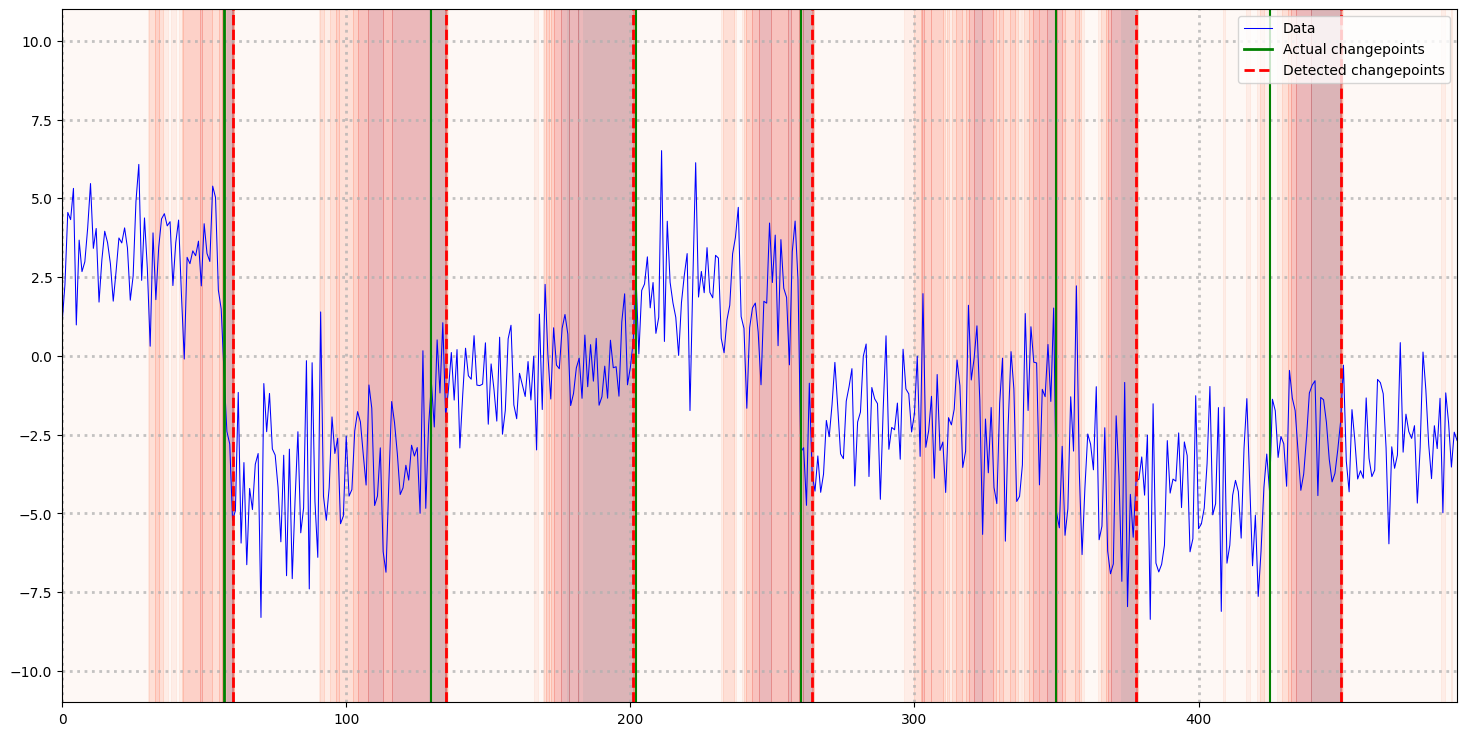

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from cusum import CusumMeanDetector

np.random.seed(456)
torch.manual_seed(456)

segment_lengths = [np.random.randint(30, 100) for _ in range(7)]


# y = torch.concat([torch.normal(torch.zeros(seg_len)+np.random.uniform(-5,5),np.random.uniform()+1) for seg_len in segment_lengths])
y = np.concatenate(
    [
        np.random.normal(
            loc=np.random.uniform(-5, 5),  # Mean (mu) between -5 and 5
            scale=np.random.uniform() + 1,  # Std Dev (sigma) between 1 and 2
            size=seg_len,  # Number of samples
        )
        for seg_len in segment_lengths
    ]
)


test = CusumMeanDetector()
outs = [test.predict_next(y[i]) for i in range(len(y))]

cps = np.where(list(map(lambda x: x[1], outs)))[0]
probs = np.array(list(map(lambda x: x[0], outs)))

X, Y = np.meshgrid(np.arange(len(y)), np.linspace(-11, 11))
Z = probs[X]


plt.figure(figsize=(18, 9))
plt.contourf(X, Y, Z, alpha=0.3, cmap="Reds")
plt.plot(np.arange(len(y)), y, lw=0.75, label="Data", color="blue")

plt.axvline(
    np.cumsum(segment_lengths)[0], color="green", label="Actual changepoints", lw=2
)
[plt.axvline(cp, color="green") for cp in np.cumsum(segment_lengths)[1:-1]]

plt.axvline(
    cps[0], color="red", linestyle="dashed", label="Detected changepoints", lw=2
)
[plt.axvline(cp, color="red", linestyle="dashed", lw=2) for cp in cps[1:]]

plt.grid(alpha=0.75, linestyle="dotted", lw=2)

plt.legend()

[ 85 196 325 377]
[85, 196, 325, 377]


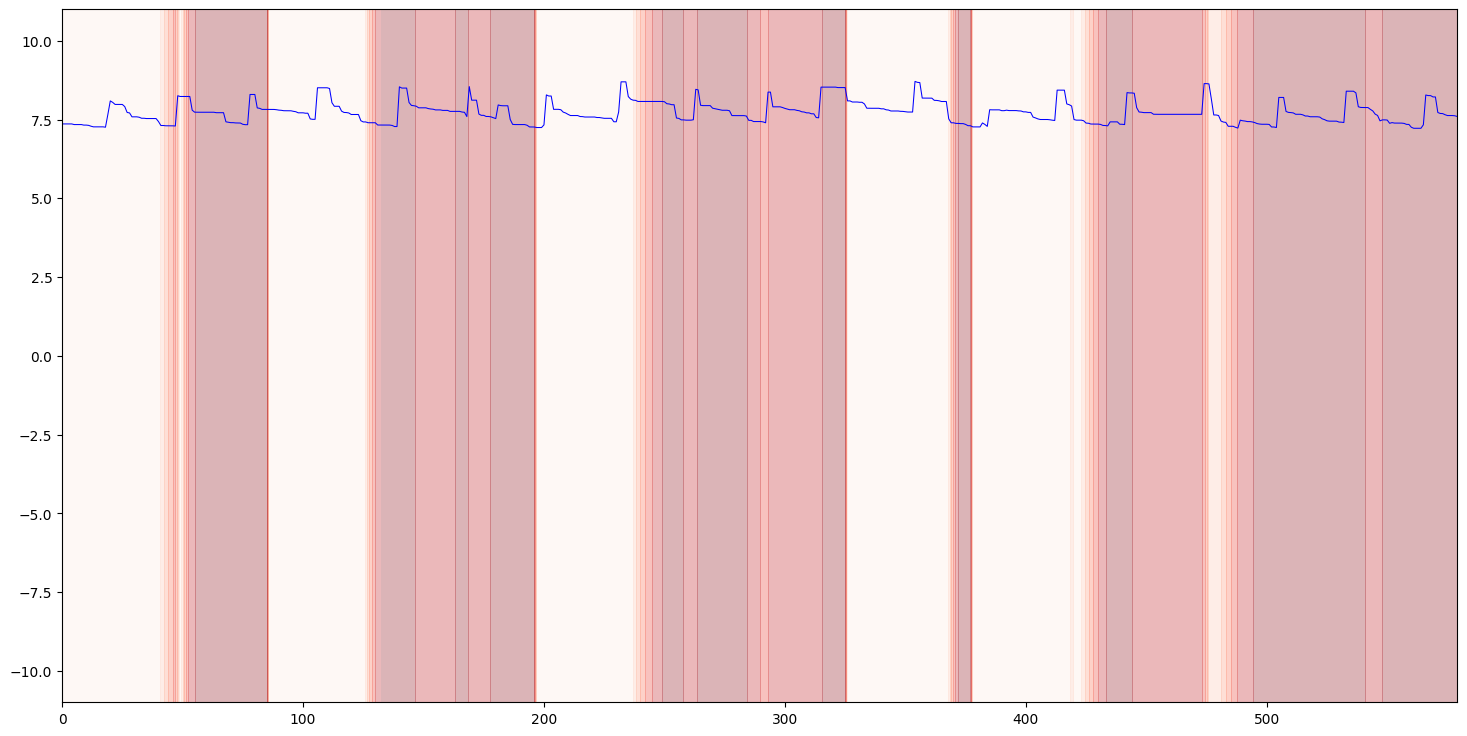

In [2]:

y = np.loadtxt("bank.csv", delimiter=",", skiprows=1)

test = CusumMeanDetector(t_warmup=40, p_limit=0.001)
outs = [test.predict_next(y[i]) for i in range(len(y))]

cps = np.where(list(map(lambda x: x[1], outs)))[0]
probs = np.array(list(map(lambda x: x[0], outs)))

X, Y = np.meshgrid(np.arange(len(y)), np.linspace(-11, 11))
Z = probs[X]


print(cps)
test.reinit()
print(test.detect(y))

plt.figure(figsize=(18, 9))
plt.contourf(X, Y, Z, alpha=0.3, cmap="Reds")
plt.plot(np.arange(len(y)), y, lw=0.75, label="Data", color="blue")
